(supply_demand_multiple_goods)=
# Supply and Demand with Many Goods

## Overview

In a {doc}`previous lecture <intro_supply_demand>` we studied supply, demand
and welfare in a market with a single consumption good.

In this lecture, we study a setting with $n$ goods and $n$ corresponding prices.

Key infrastructure concepts that we'll encounter in this lecture are

* inverse demand curves
* marginal utilities of wealth
* inverse supply curves
* consumer surplus
* producer surplus
* social welfare as a sum of consumer and producer surpluses
* competitive equilibrium


We will provide a version of the [first fundamental welfare theorem](https://en.wikipedia.org/wiki/Fundamental_theorems_of_welfare_economics), which was formulated by 

* [Leon Walras](https://en.wikipedia.org/wiki/L%C3%A9on_Walras)
* [Francis Ysidro Edgeworth](https://en.wikipedia.org/wiki/Francis_Ysidro_Edgeworth)
* [Vilfredo Pareto](https://en.wikipedia.org/wiki/Vilfredo_Pareto)

Important extensions to the key ideas were obtained by

* [Abba Lerner](https://en.wikipedia.org/wiki/Abba_P._Lerner)
* [Harold Hotelling](https://en.wikipedia.org/wiki/Harold_Hotelling)
* [Paul Samuelson](https://en.wikipedia.org/wiki/Paul_Samuelson)
* [Kenneth Arrow](https://en.wikipedia.org/wiki/Kenneth_Arrow) 
* [Gerard Debreu](https://en.wikipedia.org/wiki/G%C3%A9rard_Debreu)


We shall describe two classic welfare theorems:

* **first welfare theorem:** for a given distribution of wealth among consumers, a competitive  equilibrium  allocation of goods solves a  social planning problem.

* **second welfare theorem:** An allocation of goods to consumers that solves a social planning problem can be supported by a competitive equilibrium with an appropriate initial distribution of  wealth.

As usual, we start by importing some Python modules.

In [1]:
# import some packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv

## Formulas from linear algebra

We shall apply formulas from linear algebra that

* differentiate an inner product with respect to each vector
* differentiate a product of a matrix and a vector with respect to the vector
* differentiate a quadratic form in a vector with respect to the vector

Where $a$ is an $n \times 1$ vector, $A$ is an $n \times n$ matrix, and $x$ is an $n \times 1$ vector:

$$
\frac{\partial a^\top x }{\partial x} = \frac{\partial x^\top a }{\partial x} = a
$$

$$
\frac{\partial A x} {\partial x} = A
$$

$$
\frac{\partial x^\top A x}{\partial x} = (A + A^\top)x
$$

## From utility function to demand curve

Our study of consumers will use the following primitives

* $\Pi$ be an $m \times n$ matrix,
* $b$ be an $m \times 1$ vector of bliss points,
* $e$ be an $n \times 1$ vector of endowments, and

We will analyze endogenous objects $c$ and $p$, where

* $c$ is an $n \times 1$ vector of consumptions of various goods,
* $p$ is an $n \times 1$ vector of prices

The matrix $\Pi$ describes a consumer's willingness to substitute one good for every other good.

We assume that $\Pi$ has linearly independent columns, which implies that $\Pi^\top \Pi$ is a positive definite matrix.

* it follows that $\Pi^\top \Pi$ has an inverse.

We shall see below that $(\Pi^\top \Pi)^{-1}$ is a matrix of slopes of (compensated) demand curves for $c$ with respect to a vector of prices:

$$
    \frac{\partial c } {\partial p} = (\Pi^\top \Pi)^{-1}
$$

A consumer faces $p$ as a price taker and chooses $c$ to maximize the utility function

$$
    - \frac{1}{2} (\Pi c -b) ^\top (\Pi c -b )
$$ (eq:old0)

subject to the budget constraint

$$
    p^\top (c -e ) = 0
$$ (eq:old2)

We shall specify examples in which $\Pi$ and $b$ are such that it typically happens that

$$
    \Pi c \ll b
$$ (eq:bversusc)

This means that the consumer has much less of each good than he wants.

The deviation in {eq}`eq:bversusc` will ultimately assure us that competitive equilibrium prices are positive.

### Demand curve implied by constrained utility maximization

For now, we assume that the budget constraint is {eq}`eq:old2`.

So we'll be deriving what is known as  a **Marshallian** demand curve.

Our aim is to maximize [](eq:old0) subject to [](eq:old2).

Form a Lagrangian

$$ L = - \frac{1}{2} (\Pi c -b)^\top (\Pi c -b ) + \mu [p^\top (e-c)] $$

where $\mu$ is a Lagrange multiplier that is often called a **marginal utility of wealth**.

The consumer chooses $c$ to maximize $L$ and $\mu$ to minimize it.

First-order conditions for $c$ are

$$
    \frac{\partial L} {\partial c}
    = - \Pi^\top \Pi c + \Pi^\top b - \mu p = 0
$$

so that, given $\mu$, the consumer chooses

$$
    c = (\Pi^\top \Pi )^{-1}(\Pi^\top b -  \mu p )
$$ (eq:old3)

Substituting {eq}`eq:old3` into budget constraint {eq}`eq:old2` and solving for $\mu$ gives

$$
    \mu(p,e) = \frac{p^\top ( \Pi^\top \Pi )^{-1} \Pi^\top b - p^\top e}{p^\top (\Pi^\top \Pi )^{-1} p}.
$$ (eq:old4)

Equation {eq}`eq:old4` tells how marginal utility of wealth depends on the endowment vector $e$ and the price vector $p$.

```{note}
Equation {eq}`eq:old4` is a consequence of imposing that $p^\top (c - e) = 0$.  

We could instead take $\mu$ as a parameter and use {eq}`eq:old3` and the budget constraint {eq}`eq:old2p` to solve for wealth. 

Which way we proceed determines whether we are constructing a **Marshallian** or **Hicksian** demand curve.
```

## Endowment economy

We now study a pure-exchange economy, or what is sometimes called an endowment economy.

Consider a single-consumer, multiple-goods economy without production.

The only source of goods is the single consumer's endowment vector $e$.

A competitive equilibrium price vector induces the consumer to choose $c=e$.

This implies that the equilibrium price vector satisfies

$$
p = \mu^{-1} (\Pi^\top b - \Pi^\top \Pi e)
$$

In the present case where we have imposed budget constraint in the form {eq}`eq:old2`, we are free to normalize the price vector by setting the marginal utility of wealth $\mu =1$ (or any other value for that matter).

This amounts to choosing a common unit (or numeraire) in which prices of all goods are expressed.

(Doubling all prices will affect neither quantities nor relative prices.)

We'll set $\mu=1$.

```{exercise}
:label: sdm_ex1

Verify that setting $\mu=1$ in {eq}`eq:old3` implies that formula {eq}`eq:old4` is satisfied.

```

```{exercise}
:label: sdm_ex2

Verify that setting  $\mu=2$ in {eq}`eq:old3` also implies that formula
{eq}`eq:old4` is satisfied.

```

Here is a class that computes competitive equilibria for our economy.

In [2]:
class ExchangeEconomy:
    
    def __init__(self, 
                 Π, 
                 b, 
                 e,
                 thres=1.5):
        """
        Set up the environment for an exchange economy

        Args:
            Π (np.array): shared matrix of substitution
            b (list):  the consumer's bliss point
            e (list):  the consumer's endowment
            thres (float): a threshold to check p >> Π e condition
        """

        # check non-satiation
        if np.min(b / np.max(Π @ e)) <= thres:
            raise Exception('set bliss points further away')


        self.Π, self.b, self.e = Π, b, e

    
    def competitive_equilibrium(self):
        """
        Compute the competitive equilibrium prices and allocation
        """
        Π, b, e = self.Π, self.b, self.e

        # compute price vector with μ=1
        p = Π.T @ b - Π.T @ Π @ e
        
        # compute consumption vector
        slope_dc = inv(Π.T @ Π)
        Π_inv = inv(Π)
        c = Π_inv @ b - slope_dc @ p

        if any(c < 0):
            print('allocation: ', c)
            raise Exception('negative allocation: equilibrium does not exist')

        return p, c

## Digression: Marshallian and Hicksian demand curves

Sometimes we'll use budget constraint {eq}`eq:old2` in situations in which a consumer's endowment vector $e$ is his **only** source of income.

Other times we'll instead assume that the consumer has another source of income (positive or negative) and write his budget constraint as

$$
p ^\top (c -e ) = w
$$ (eq:old2p)

where $w$ is measured in "dollars" (or some other **numeraire**) and component $p_i$ of the price vector is measured in dollars per unit of good $i$.

Whether the consumer's budget constraint is {eq}`eq:old2` or {eq}`eq:old2p` and whether we take $w$ as a free parameter or instead as an endogenous variable will affect the consumer's marginal utility of wealth.

Consequently, how we set $\mu$ determines whether we are constructing

* a **Marshallian** demand curve, as when we use {eq}`eq:old2` and solve for $\mu$ using equation {eq}`eq:old4` above, or
* a **Hicksian** demand curve, as when we treat $\mu$ as a fixed parameter and solve for $w$ from {eq}`eq:old2p`.

Marshallian and Hicksian demand curves contemplate different mental experiments:

For a Marshallian demand curve, hypothetical changes in a price vector have both **substitution** and **income** effects

* income effects are consequences of changes in $p^\top e$ associated with the change in the price vector

For a Hicksian demand curve, hypothetical price vector changes have only **substitution** effects

* changes in the price vector leave the $p^\top e + w$ unaltered because we freeze $\mu$ and solve for $w$

Sometimes a Hicksian demand curve is called a **compensated** demand curve in order to emphasize that, to disarm the income (or wealth) effect associated with a price change, the consumer's wealth $w$ is adjusted.

We'll discuss these distinct demand curves more below.

## Dynamics and risk as special cases

Special cases of our $n$-good pure exchange model can be created to represent

* **dynamics** --- by putting different dates on different commodities
* **risk** --- by interpreting delivery of goods as being contingent on states of the world whose realizations are described by a *known probability distribution*

Let's illustrate how.

### Dynamics

Suppose that we want to represent a utility function

$$
  - \frac{1}{2} [(c_1 - b_1)^2 + \beta (c_2 - b_2)^2]
$$

where $\beta \in (0,1)$ is a discount factor, $c_1$ is consumption at time $1$ and $c_2$ is consumption at time 2.

To capture this with our quadratic utility function {eq}`eq:old0`, set

$$
\Pi = \begin{bmatrix} 1 & 0 \cr
         0 & \sqrt{\beta} \end{bmatrix}
$$

$$
e = \begin{bmatrix} e_1 \cr e_2 \end{bmatrix}
$$

and

$$
b = \begin{bmatrix} b_1 \cr \sqrt{\beta} b_2
\end{bmatrix}
$$

The budget constraint {eq}`eq:old2` becomes

$$
p_1 c_1 + p_2 c_2 = p_1 e_1 + p_2 e_2
$$

The left side is the **discounted present value** of consumption.

The right side is the **discounted present value** of the consumer's endowment.

The relative price  $\frac{p_1}{p_2}$ has units of time $2$ goods per unit of time $1$ goods.

Consequently, 

$$
    (1+r) := R := \frac{p_1}{p_2}
$$ 

is the **gross interest rate** and $r$ is the **net interest rate**.

Here is an example.

In [3]:
beta = 0.95

Π = np.array([[1, 0],
              [0, np.sqrt(beta)]])

b = np.array([5, np.sqrt(beta) * 5])

e = np.array([1, 1])

dynamics = ExchangeEconomy(Π, b, e)
p, c = dynamics.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price vector: [4.  3.8]
Competitive equilibrium allocation: [1. 1.]


### Risk and state-contingent claims

We study risk in the context of a **static** environment, meaning that there is only one period.

By **risk** we mean that an outcome is not known in advance, but that it is governed by a known probability distribution.

As an example, our consumer confronts **risk** means in particular that

  * there are two states of nature, $1$ and $2$.

  * the consumer knows that the probability that state $1$ occurs is $\lambda$.

  * the consumer knows that the probability that state $2$ occurs is $(1-\lambda)$.

Before the outcome is realized, the consumer's **expected utility** is

$$
- \frac{1}{2} [\lambda (c_1 - b_1)^2 + (1-\lambda)(c_2 - b_2)^2]
$$

where

* $c_1$ is consumption in state $1$
* $c_2$ is consumption in state $2$

To capture these preferences we set

$$
\Pi = \begin{bmatrix} \sqrt{\lambda} & 0 \cr
                     0  & \sqrt{1-\lambda} \end{bmatrix}
$$

$$
e = \begin{bmatrix} e_1 \cr e_2 \end{bmatrix}
$$

$$
b = \begin{bmatrix} \sqrt{\lambda}b_1 \cr \sqrt{1-\lambda}b_2 \end{bmatrix}
$$

A consumer's endowment vector is

$$
c = \begin{bmatrix} c_1 \cr c_2 \end{bmatrix}
$$

A price vector is

$$
p = \begin{bmatrix} p_1 \cr p_2 \end{bmatrix}
$$

where $p_i$ is the price of one unit of consumption in state $i \in \{1, 2\}$.

The state-contingent goods being traded are often called **Arrow securities**.

Before the random state of the world $i$ is realized, the consumer sells his/her state-contingent endowment bundle and purchases a state-contingent consumption bundle.

Trading such state-contingent goods is one way economists often model **insurance**.

We use the tricks described above to interpret  $c_1, c_2$ as "Arrow securities" that are state-contingent claims to consumption goods.

Here is an instance of the risk economy:

In [4]:
prob = 0.2

Π = np.array([[np.sqrt(prob), 0],
              [0, np.sqrt(1 - prob)]])

b = np.array([np.sqrt(prob) * 5, np.sqrt(1 - prob) * 5])

e = np.array([1, 1])

risk = ExchangeEconomy(Π, b, e)
p, c = risk.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price vector: [0.8 3.2]
Competitive equilibrium allocation: [1. 1.]


```{exercise}
:label: sdm_ex3

Consider the instance above.

Please numerically study how each of the following cases affects the equilibrium prices and allocations:

* the consumer gets poorer,
* they like the first good more, or
* the probability that state $1$ occurs is higher.

Hints. For each case choose some parameter $e, b, \text{ or } \lambda$ different from the instance.

```

```{solution-start} sdm_ex3
:class: dropdown
```

First consider when the consumer is poorer.

Here we just decrease the endowment.

In [5]:
risk.e = np.array([0.5, 0.5])

p, c = risk.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price vector: [0.9 3.6]
Competitive equilibrium allocation: [0.5 0.5]


If the consumer likes the first (or second) good more, then we can set a larger bliss value for good 1.

In [6]:
risk.b = np.array([np.sqrt(prob) * 6, np.sqrt(1 - prob) * 5])
p, c = risk.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price vector: [1.1 3.6]
Competitive equilibrium allocation: [0.5 0.5]


Increase the probability that state $1$ occurs.

In [7]:
prob = 0.8

Π = np.array([[np.sqrt(prob), 0],
              [0, np.sqrt(1 - prob)]])

b = np.array([np.sqrt(prob) * 5, np.sqrt(1 - prob) * 5])

e = np.array([1, 1])

risk = ExchangeEconomy(Π, b, e)
p, c = risk.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price vector: [3.2 0.8]
Competitive equilibrium allocation: [1. 1.]


```{solution-end}
```

## Economies with endogenous supplies of goods

Up to now we have described a pure exchange economy in which endowments of goods are exogenous, meaning that they are taken as given from outside the model.

### Supply curve of a competitive firm

A competitive firm that can produce goods takes a price vector $p$ as given and chooses a quantity $q$
to maximize total revenue minus total costs.

The firm's total revenue equals $p^\top q$ and its total cost equals $C(q)$ where $C(q)$ is a total cost function

$$
C(q) = h ^\top q +  \frac{1}{2} q^\top J q
$$


and $J$ is a positive definite matrix.


So the firm's profits are

$$
p^\top q - C(q)
$$ (eq:compprofits)



An $n\times 1$ vector of **marginal costs** is

$$
\frac{\partial C(q)}{\partial q} = h + H q
$$

where

$$
H =  \frac{1}{2} (J + J^\top)
$$

The firm maximizes total profits by setting **marginal revenue to marginal costs**.

An $n \times 1$ vector of marginal revenues for the price-taking firm is $\frac{\partial p^\top q}
{\partial q} = p $.

So **price equals marginal revenue** for our price-taking competitive firm.

This leads to the following **inverse supply curve** for the competitive firm:


$$
p = h + H q
$$




### Competitive equilibrium


To compute a competitive equilibrium for a production economy where demand curve is pinned down by the marginal utility of wealth $\mu$, we first compute an allocation by solving a planning problem.

Then we compute the equilibrium price vector using the inverse demand or supply curve.

#### $\mu=1$ warmup

As a special case, let's pin down a demand curve by setting the marginal utility of wealth $\mu =1$.

Equating supply price to demand price and letting $q=c$ we get

$$
p = h + H c = \Pi^\top b - \Pi^\top \Pi c ,
$$

which implies the equilibrium quantity vector

$$
c = (\Pi^\top \Pi + H )^{-1} ( \Pi^\top b - h)
$$ (eq:old5)

This equation is the counterpart of equilibrium quantity {eq}`eq:old1` for the scalar $n=1$ model with which we began.

#### General $\mu\neq 1$ case

Now let's extend the preceding analysis to a more
general case by allowing $\mu \neq 1$.

Then the inverse demand curve is

$$
p = \mu^{-1} [\Pi^\top b - \Pi^\top \Pi c]
$$ (eq:old5pa)

Equating this to the inverse supply curve, letting $q=c$ and solving
for $c$ gives

$$
c = [\Pi^\top \Pi + \mu H]^{-1} [ \Pi^\top b - \mu h]
$$ (eq:old5p)

### Implementation

A Production Economy will consist of

* a single **person** that we'll interpret as a representative consumer
* a single set of **production costs**
* a multiplier $\mu$ that weights "consumers" versus "producers" in a planner's welfare function, as described above in the main text
* an $n \times 1$ vector $p$ of competitive equilibrium prices
* an $n \times 1$ vector $c$ of competitive equilibrium quantities
* **consumer surplus**
* **producer surplus**

Here we define a class ``ProductionEconomy``.

In [8]:
class ProductionEconomy:
    
    def __init__(self, 
                 Π, 
                 b, 
                 h, 
                 J, 
                 μ):
        """
        Set up the environment for a production economy

        Args:
            Π (np.ndarray): matrix of substitution
            b (np.array): bliss points
            h (np.array): h in cost func
            J (np.ndarray): J in cost func
            μ (float): welfare weight of the corresponding planning problem
        """
        self.n = len(b)
        self.Π, self.b, self.h, self.J, self.μ = Π, b, h, J, μ
        
    def competitive_equilibrium(self):
        """
        Compute a competitive equilibrium of the production economy
        """
        Π, b, h, μ, J = self.Π, self.b, self.h, self.μ, self.J
        H = .5 * (J + J.T)

        # allocation
        c = inv(Π.T @ Π + μ * H) @ (Π.T @ b - μ * h)

        # price
        p = 1 / μ * (Π.T @ b - Π.T @ Π @ c)

        # check non-satiation
        if any(Π @ c - b >= 0):
            raise Exception('invalid result: set bliss points further away')

        return c, p

    def compute_surplus(self):
        """
        Compute consumer and producer surplus for single good case
        """
        if self.n != 1:
            raise Exception('not single good')
        h, J, Π, b, μ = self.h.item(), self.J.item(), self.Π.item(), self.b.item(), self.μ
        H = J

        # supply/demand curve coefficients
        s0, s1 = h, H
        d0, d1 = 1 / μ * Π * b, 1 / μ * Π**2

        # competitive equilibrium
        c, p = self.competitive_equilibrium()

        # calculate surplus
        c_surplus = d0 * c - .5 * d1 * c**2 - p * c
        p_surplus = p * c - s0 * c - .5 * s1 * c**2

        return c_surplus, p_surplus

Then define a function that plots demand and supply curves and labels surpluses and equilibrium.

In [9]:
def plot_competitive_equilibrium(PE):
    """
    Plot demand and supply curves, producer/consumer surpluses, and equilibrium for
    a single good production economy

    Args:
        PE (class): A initialized production economy class
    """
    # get singleton value
    J, h, Π, b, μ = PE.J.item(), PE.h.item(), PE.Π.item(), PE.b.item(), PE.μ
    H = J

    # compute competitive equilibrium
    c, p = PE.competitive_equilibrium()
    c, p = c.item(), p.item()

    # inverse supply/demand curve
    supply_inv = lambda x: h + H * x
    demand_inv = lambda x: 1 / μ * (Π * b - Π * Π * x)

    xs = np.linspace(0, 2 * c, 100)
    ps = np.ones(100) * p
    supply_curve = supply_inv(xs)
    demand_curve = demand_inv(xs)

    # plot
    plt.figure()
    plt.plot(xs, supply_curve, label='Supply', color='#020060')
    plt.plot(xs, demand_curve, label='Demand', color='#600001')

    plt.fill_between(xs[xs <= c], demand_curve[xs <= c], ps[xs <= c], label='Consumer surplus', color='#EED1CF')
    plt.fill_between(xs[xs <= c], supply_curve[xs <= c], ps[xs <= c], label='Producer surplus', color='#E6E6F5')

    plt.vlines(c, 0, p, linestyle="dashed", color='black', alpha=0.7)
    plt.hlines(p, 0, c, linestyle="dashed", color='black', alpha=0.7)
    plt.scatter(c, p, zorder=10, label='Competitive equilibrium', color='#600001')

    plt.legend(loc='upper right')
    plt.margins(x=0, y=0)
    plt.ylim(0)
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.show()

#### Example: single agent with one good and production

Now let's construct an example of a production economy with one good.

To do this we

  * specify a single **person** and a **cost curve** in a way that let's us replicate the simple single-good supply demand example with which we started

  * compute equilibrium $p$ and $c$ and consumer and producer surpluses

  * draw graphs of both surpluses

  * do experiments in which we shift $b$ and watch what happens to $p, c$.

Competitive equilibrium price: 5.25
Competitive equilibrium allocation: 4.75


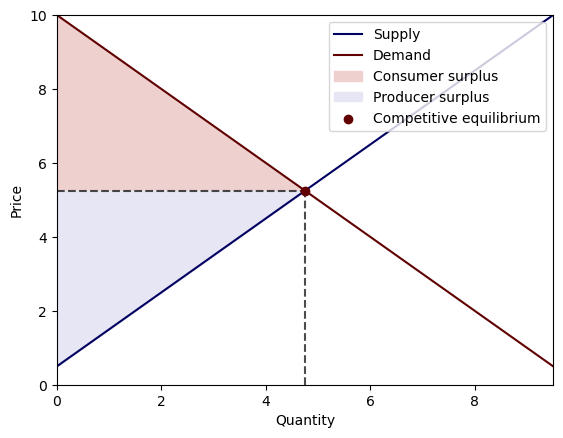

In [10]:
Π = np.array([[1]])  # the matrix now is a singleton
b = np.array([10])
h = np.array([0.5])
J = np.array([[1]])
μ = 1

PE = ProductionEconomy(Π, b, h, J, μ)
c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p.item())
print('Competitive equilibrium allocation:', c.item())

# plot
plot_competitive_equilibrium(PE)

In [11]:
c_surplus, p_surplus = PE.compute_surplus()

print('Consumer surplus:', c_surplus.item())
print('Producer surplus:', p_surplus.item())

Consumer surplus: 11.28125
Producer surplus: 11.28125


Let's give the consumer a lower welfare weight by raising $\mu$.

Competitive equilibrium price: 3.5
Competitive equilibrium allocation: 3.0


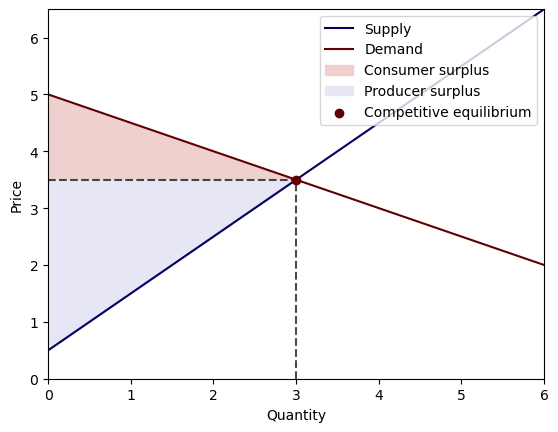

In [12]:
PE.μ = 2
c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p.item())
print('Competitive equilibrium allocation:', c.item())

# plot
plot_competitive_equilibrium(PE)

In [13]:
c_surplus, p_surplus = PE.compute_surplus()

print('Consumer surplus:', c_surplus.item())
print('Producer surplus:', p_surplus.item())

Consumer surplus: 2.25
Producer surplus: 4.5


Now we change the bliss point so that the consumer derives more utility from consumption.

Competitive equilibrium price: 7.75
Competitive equilibrium allocation: 7.25


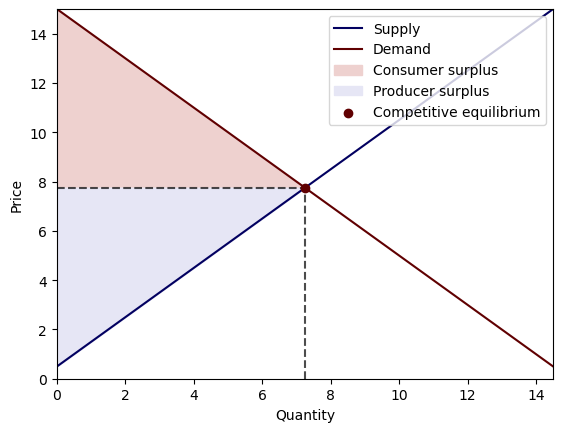

In [14]:
PE.μ = 1
PE.b = PE.b * 1.5
c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p.item())
print('Competitive equilibrium allocation:', c.item())

# plot
plot_competitive_equilibrium(PE)

This raises both the equilibrium price and quantity.


#### Example: single agent two-good economy with production

  * we'll do some experiments like those above

  * we can do experiments with a **diagonal** $\Pi$ and also with a **non-diagonal** $\Pi$ matrices to study how cross-slopes affect responses of $p$ and $c$ to various shifts in $b$ (TODO)

In [15]:
Π = np.array([[1, 0],
              [0, 1]])

b = np.array([10, 10])

h = np.array([0.5, 0.5])

J = np.array([[1, 0.5],
              [0.5, 1]])
μ = 1

PE = ProductionEconomy(Π, b, h, J, μ)
c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price: [6.2 6.2]
Competitive equilibrium allocation: [3.8 3.8]


In [16]:
PE.b = np.array([12, 10])

c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price: [7.13333333 6.46666667]
Competitive equilibrium allocation: [4.86666667 3.53333333]


In [17]:
PE.Π = np.array([[1, 0.5],
                 [0.5, 1]])

PE.b = np.array([10, 10])

c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price: [6.3 6.3]
Competitive equilibrium allocation: [3.86666667 3.86666667]


In [18]:
PE.b = np.array([12, 10])
c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price: [7.23333333 6.56666667]
Competitive equilibrium allocation: [4.93333333 3.6       ]


### Digression: a supplier who is a monopolist

A competitive firm is a **price-taker** who regards the price and therefore its marginal revenue as being beyond its control.

A monopolist knows that it has no competition and can influence the price and its marginal revenue by
setting quantity.

A monopolist takes a **demand curve** and not the **price** as beyond its control.

Thus, instead of being a price-taker, a monopolist sets prices to maximize profits subject to the inverse demand curve
{eq}`eq:old5pa`.

So the monopolist's total profits as a function of its output $q$ is

$$
[\mu^{-1} \Pi^\top (b - \Pi q)]^\top  q - h^\top q -  \frac{1}{2} q^\top J q
$$ (eq:monopprof)

After finding
first-order necessary conditions for maximizing monopoly profits with respect to $q$
and solving them for $q$, we find that the monopolist sets

$$
q = (H + 2 \mu^{-1} \Pi^\top \Pi)^{-1} (\mu^{-1} \Pi^\top b - h)
$$ (eq:qmonop)

We'll soon see that a monopolist sets a **lower output** $q$ than does either a

 * planner who chooses $q$ to maximize social welfare

 * a competitive equilibrium



```{exercise}
:label: sdm_ex4

Please  verify the monopolist's supply curve {eq}`eq:qmonop`.

```

### A monopolist

Let's consider a monopolist supplier.

We have included a method in our `ProductionEconomy` class to compute an equilibrium price and allocation when the supplier is a monopolist.

Since the supplier now has the price-setting power

- we first compute the optimal quantity that solves the monopolist's profit maximization problem.
- Then we back out an equilibrium price from the consumer's inverse demand curve.

Next, we use a graph for the single good case to illustrate the difference between a competitive equilibrium and an equilibrium with a monopolist supplier.

Recall that in a competitive equilibrium, a price-taking supplier equates marginal revenue $p$ to marginal cost $h + Hq$.

This yields a competitive producer's inverse supply curve.

A monopolist's marginal revenue is not constant but instead is a non-trivial function of the quantity it sets.

The monopolist's marginal revenue is

$$
MR(q) = -2\mu^{-1}\Pi^{\top}\Pi q+\mu^{-1}\Pi^{\top}b,
$$

which the monopolist equates to its marginal cost.

The plot indicates that the monopolist's sets output  lower than either the competitive equilibrium quantity.

In a single good case, this equilibrium is associated with a higher price of the good.

In [19]:
class Monopoly(ProductionEconomy):
    
    def __init__(self, 
                 Π, 
                 b, 
                 h, 
                 J, 
                 μ):
        """
        Inherit all properties and methods from class ProductionEconomy
        """
        super().__init__(Π, b, h, J, μ)
        

    def equilibrium_with_monopoly(self):
        """
        Compute the equilibrium price and allocation when there is a monopolist supplier
        """
        Π, b, h, μ, J = self.Π, self.b, self.h, self.μ, self.J
        H = .5 * (J + J.T)

        # allocation
        q = inv(μ * H + 2 * Π.T @ Π) @ (Π.T @ b - μ * h)

        # price
        p = 1 / μ * (Π.T @ b - Π.T @ Π @ q)

        if any(Π @ q - b >= 0):
            raise Exception('invalid result: set bliss points further away')

        return q, p

Define a function that plots the demand, marginal cost and marginal revenue curves with surpluses and equilibrium labelled.

In [20]:
def plot_monopoly(M):
    """
    Plot demand curve, marginal production cost and revenue, surpluses and the
    equilibrium in a monopolist supplier economy with a single good

    Args:
        M (class): A class inherits class ProductionEconomy with monopoly
    """
    # get singleton value
    J, h, Π, b, μ = M.J.item(), M.h.item(), M.Π.item(), M.b.item(), M.μ
    H = J

    # compute competitive equilibrium
    c, p = M.competitive_equilibrium()
    q, pm = M.equilibrium_with_monopoly()
    c, p, q, pm = c.item(), p.item(), q.item(), pm.item()

    # compute

    # inverse supply/demand curve
    marg_cost = lambda x: h + H * x
    marg_rev = lambda x: -2 * 1 / μ * Π * Π * x + 1 / μ * Π * b
    demand_inv = lambda x: 1 / μ * (Π * b - Π * Π * x)

    xs = np.linspace(0, 2 * c, 100)
    pms = np.ones(100) * pm
    marg_cost_curve = marg_cost(xs)
    marg_rev_curve = marg_rev(xs)
    demand_curve = demand_inv(xs)

    # plot
    plt.figure()
    plt.plot(xs, marg_cost_curve, label='Marginal cost', color='#020060')
    plt.plot(xs, marg_rev_curve, label='Marginal revenue', color='#E55B13')
    plt.plot(xs, demand_curve, label='Demand', color='#600001')

    plt.fill_between(xs[xs <= q], demand_curve[xs <= q], pms[xs <= q], label='Consumer surplus', color='#EED1CF')
    plt.fill_between(xs[xs <= q], marg_cost_curve[xs <= q], pms[xs <= q], label='Producer surplus', color='#E6E6F5')

    plt.vlines(c, 0, p, linestyle="dashed", color='black', alpha=0.7)
    plt.hlines(p, 0, c, linestyle="dashed", color='black', alpha=0.7)
    plt.scatter(c, p, zorder=10, label='Competitive equilibrium', color='#600001')

    plt.vlines(q, 0, pm, linestyle="dashed", color='black', alpha=0.7)
    plt.hlines(pm, 0, q, linestyle="dashed", color='black', alpha=0.7)
    plt.scatter(q, pm, zorder=10, label='Equilibrium with monopoly', color='#E55B13')

    plt.legend(loc='upper right')
    plt.margins(x=0, y=0)
    plt.ylim(0)
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.show()

#### A multiple good example

Let's compare competitive equilibrium and monopoly outcomes in a multiple goods economy.

In [21]:
Π = np.array([[1, 0],
              [0, 1.2]])

b = np.array([10, 10])

h = np.array([0.5, 0.5])

J = np.array([[1, 0.5],
              [0.5, 1]])
μ = 1

M = Monopoly(Π, b, h, J, μ)
c, p = M.competitive_equilibrium()
q, pm = M.equilibrium_with_monopoly()

print('Competitive equilibrium price:', p)
print('Competitive equilibrium allocation:', c)

print('Equilibrium with monopolist supplier price:', pm)
print('Equilibrium with monopolist supplier allocation:', q)

Competitive equilibrium price: [6.23542117 6.32397408]
Competitive equilibrium allocation: [3.76457883 3.94168467]
Equilibrium with monopolist supplier price: [7.26865672 8.23880597]
Equilibrium with monopolist supplier allocation: [2.73134328 2.6119403 ]


#### A single-good example

Competitive equilibrium price: 5.25
Competitive equilibrium allocation: 4.75
Equilibrium with monopolist supplier price: 6.833333333333334
Equilibrium with monopolist supplier allocation: 3.1666666666666665


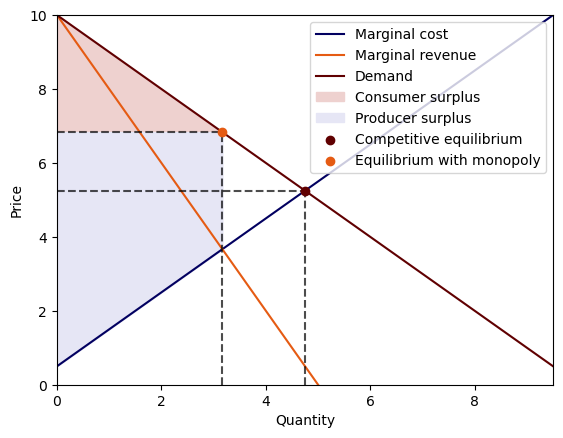

In [22]:
Π = np.array([[1]])  # the matrix now is a singleton
b = np.array([10])
h = np.array([0.5])
J = np.array([[1]])
μ = 1

M = Monopoly(Π, b, h, J, μ)
c, p = M.competitive_equilibrium()
q, pm = M.equilibrium_with_monopoly()

print('Competitive equilibrium price:', p.item())
print('Competitive equilibrium allocation:', c.item())

print('Equilibrium with monopolist supplier price:', pm.item())
print('Equilibrium with monopolist supplier allocation:', q.item())

# plot
plot_monopoly(M)

## Multi-good welfare maximization problem

Our welfare maximization problem -- also sometimes called a social planning problem  -- is to choose $c$ to maximize

$$
    - \frac{1}{2} \mu^{-1}(\Pi c -b) ^\top (\Pi c -b )
$$

minus the area under the inverse supply curve, namely,

$$
    h c +  \frac{1}{2} c^\top J c  
$$

So the welfare criterion is

$$
    - \frac{1}{2} \mu^{-1}(\Pi c -b)^\top (\Pi c -b ) -h c 
        -  \frac{1}{2} c^\top J c
$$

In this formulation, $\mu$ is a parameter that describes how the planner weighs interests of outside suppliers and our representative consumer.

The first-order condition with respect to $c$ is

$$
- \mu^{-1} \Pi^\top \Pi c + \mu^{-1}\Pi^\top b - h -  H c = 0
$$

which implies {eq}`eq:old5p`.

Thus, as for the single-good case, with multiple goods a competitive equilibrium quantity vector solves a planning problem.

(This is another version of the first welfare theorem.)

We can deduce a competitive equilibrium price vector from either

  * the inverse demand curve, or

  * the inverse supply curve